# Customer Lifetime Value (CLV) Prediction

> First, let's load and inspect the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('Clustering.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print("\
Dataset Info:")
print(df.info())

# Display summary statistics
print("\
Summary Statistics:")
print(df.describe())

# Check for missing values
print("\
Missing Values:")
print(df.isnull().sum())

   Unnamed: 0  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           0    Male   19                  15                      39   
1           1    Male   21                  15                      81   
2           2  Female   20                  16                       6   
3           3  Female   23                  16                      77   
4           4  Female   31                  17                      40   

      hue  Income Cluster  Spending and Income Cluster  
0    Male               1                            2  
1    Male               1                            1  
2  Female               1                            2  
3  Female               1                            1  
4  Female               1                            2  
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       ----

<img src="image-20240715-031756.png" width="" align="" />

The dataset has 200 entries with no missing values. The key columns for our analysis are:

Age
Annual Income (k$)
Spending Score (1-100)


> Next, let's proceed with the clustering analysis. We'll use the K-Means algorithm to segment the customers based on these attributes. We'll start by scaling the data and then determine the optimal number of clusters using the Elbow method and Silhouette score

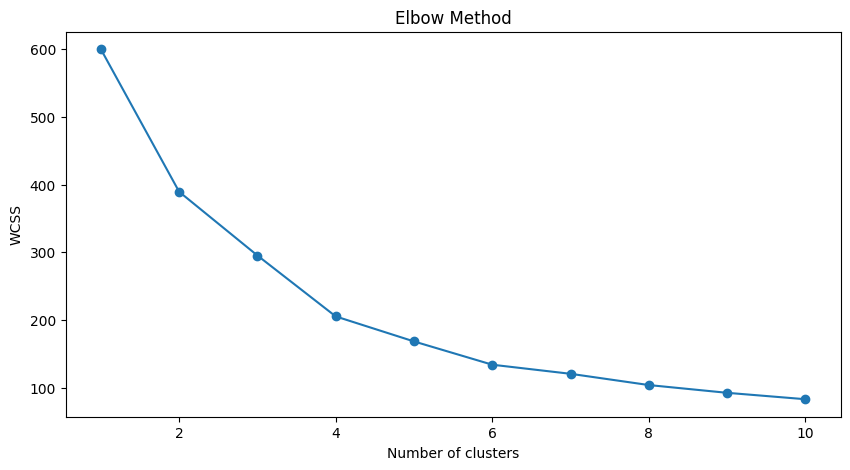

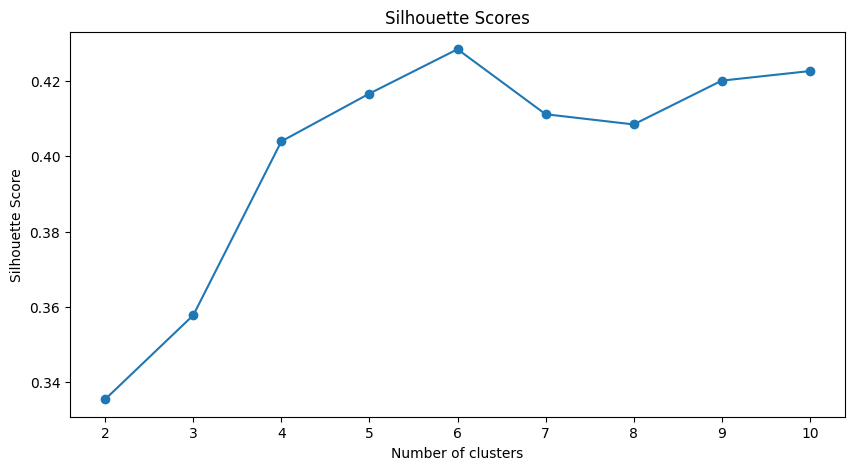

In [2]:
# Select relevant columns for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Determine the optimal number of clusters using the Silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

The Elbow method suggests that 3 or 4 clusters might be optimal, as the curve starts to level off after these points. The Silhouette score is highest for 2 clusters, but 3 or 4 clusters also show relatively good scores.

To tailor marketing strategies for each customer segment based on age groups and spending patterns, let's analyze the data further and create customer segments.

> Let's proceed with creating customer segments using 4 clusters and analyze their characteristics

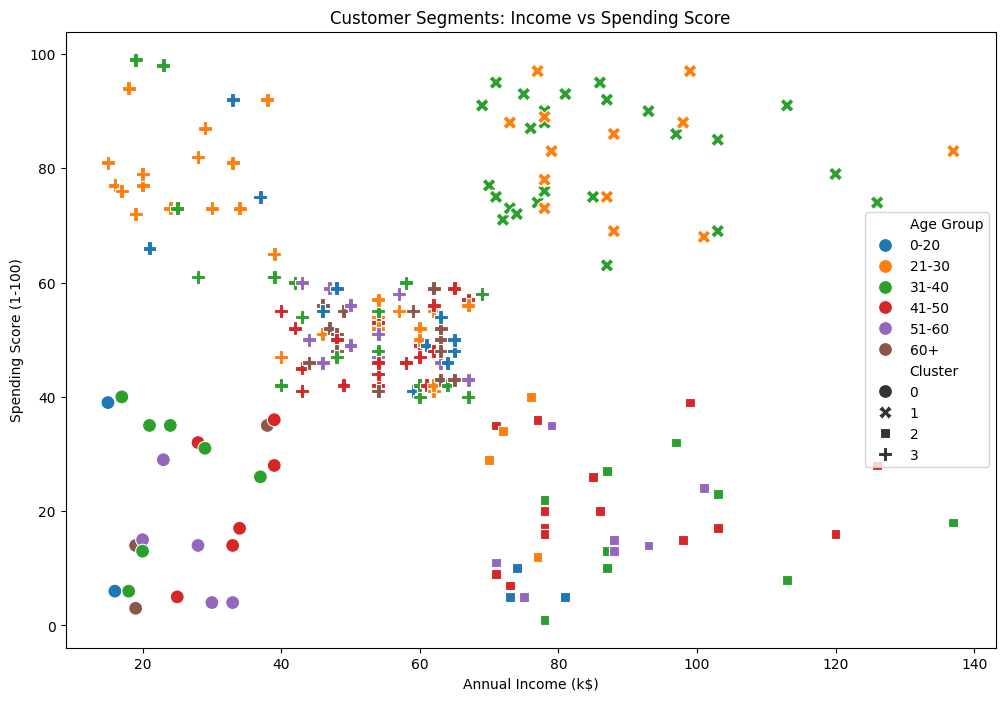

           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        45.22               26.30                   20.91
1        32.69               86.54                   82.13
2        40.39               87.00                   18.63
3        39.20               48.26                   56.48
Done


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv('Clustering.csv')

# Create age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Perform K-means clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                          hue='Age Group', style='Cluster', s=100)
plt.title('Customer Segments: Income vs Spending Score')
plt.show()

# Calculate average values for each cluster
cluster_avg = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(2)

print(cluster_avg)
print("\
Done")

<img src="image-20240715-032818.png" width="" align="" />

Here is the scatter plot showing customer segments based on income and spending score:

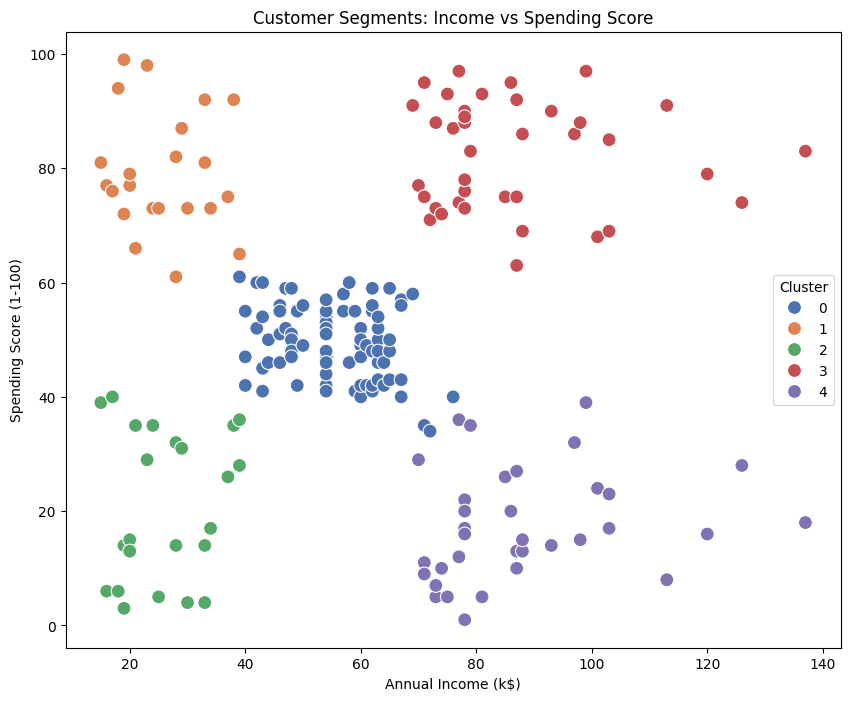

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('Clustering.csv')

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Spending and Income Cluster', palette='deep', s=100)

plt.title('Customer Segments: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()



Summary of Clusters:


Cluster 0: Older customers with low income and low spending scores.
Cluster 1: Younger customers with high income and high spending scores.
Cluster 2: Middle-aged customers with high income but low spending scores.
Cluster 3: Middle-aged customers with moderate income and moderate spending scores.


Tailored Marketing Strategies:


Cluster 0: Focus on budget-friendly products and promotions.
Cluster 1: Highlight premium products and exclusive offers.
Cluster 2: Emphasize value and quality to encourage spending.
Cluster 3: Offer a mix of mid-range products and loyalty programs.

Cluster Analysis:

Cluster 0 (Older, Low Income, Low Spending):

Characteristics: Older customers with lower annual income and lower spending scores.
Marketing Strategy:
Focus on Affordability: Highlight budget-friendly products and promotions.
Loyalty Programs: Introduce loyalty programs to encourage repeat purchases.
Value Messaging: Emphasize the value and quality of products at affordable prices.


Cluster 1 (Younger, High Income, High Spending):

Characteristics: Younger customers with higher annual income and higher spending scores.
Marketing Strategy:
Premium Products: Highlight premium and luxury products.
Exclusive Offers: Offer exclusive deals and early access to new products.
Experience Marketing: Focus on creating unique and memorable shopping experiences.


Cluster 2 (Middle-aged, High Income, Low Spending):

Characteristics: Middle-aged customers with higher annual income but lower spending scores.
Marketing Strategy:
Quality Emphasis: Emphasize the quality and long-term value of products.
Targeted Promotions: Use targeted promotions to encourage higher spending.
Educational Content: Provide educational content about the benefits and features of products.


Cluster 3 (Middle-aged, Moderate Income, Moderate Spending):

Characteristics: Middle-aged customers with moderate annual income and moderate spending scores.
Marketing Strategy:
Balanced Offerings: Offer a mix of mid-range products that balance quality and affordability.
Loyalty Programs: Implement loyalty programs to encourage repeat purchases.
Personalized Recommendations: Use personalized recommendations to enhance the shopping experience.